In [3]:
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select * from ontime limit 5')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2008, 1, 3, 4, 2003, 1955, 2211, 2225, 'WN', 335, 'N712SW', 128, 150, 116, -14, 8, 'IAD', 'TPA', 810, 4, 8, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 754, 735, 1002, 1000, 'WN', 3231, 'N772SW', 128, 145, 113, 2, 19, 'IAD', 'TPA', 810, 5, 10, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 628, 620, 804, 750, 'WN', 448, 'N428WN', 96, 90, 76, 14, 8, 'IND', 'BWI', 515, 3, 17, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 926, 930, 1054, 1100, 'WN', 1746, 'N612SW', 88, 90, 78, -6, -4, 'IND', 'BWI', 515, 3, 7, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 1829, 1755, 1959, 1925, 'WN', 3920, 'N464WN', 90, 90, 77, 34, 34, 'IND', 'BWI', 515, 3, 10, 0, '', '0', 2, 0, 0, 0, 32)


In [4]:
# 항공사별 출발 지연 평균 시간
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select uniquecarrier, avg(depdelay) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

WN	10.2763
XE	11.0937
YV	11.5720
OH	11.1605
OO	7.2953
UA	13.7844
US	5.6355
DL	7.8880
EV	11.7114
F9	5.9011
FL	9.1839
HA	0.4511
MQ	10.2998
NW	6.4098
9E	6.5856
AA	12.8999
AQ	-1.3903
AS	6.7527
B6	12.4477
CO	13.0236


In [5]:
# 항공사별 도착 지연 평균 시간
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select uniquecarrier, avg(arrdelay) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('WN', Decimal('5.1157'))
('XE', Decimal('10.3203'))
('YV', Decimal('11.3226'))
('OH', Decimal('11.4041'))
('OO', Decimal('6.4389'))
('UA', Decimal('11.0016'))
('US', Decimal('2.8010'))
('DL', Decimal('7.7162'))
('EV', Decimal('10.0003'))
('F9', Decimal('6.0841'))
('FL', Decimal('8.9882'))
('HA', Decimal('1.2519'))
('MQ', Decimal('9.4970'))
('NW', Decimal('7.2935'))
('9E', Decimal('3.9875'))
('AA', Decimal('12.2029'))
('AQ', Decimal('-2.8709'))
('AS', Decimal('4.7214'))
('B6', Decimal('10.8594'))
('CO', Decimal('10.8098'))


In [6]:
# 도착 지연 횟수 월별 집계
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select month,count(*) from ontime where arrdelay>0 group by month')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [7]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


<BarContainer object of 12 artists>

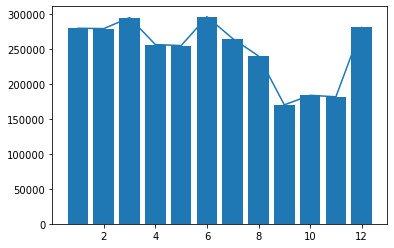

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)

In [20]:
# 요일별 평균 지연 시간
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select dayofweek,avg(arrdelay) from ontime group by dayofweek')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(4, Decimal('8.2465'))
(5, Decimal('10.6752'))
(6, Decimal('5.6825'))
(7, Decimal('9.2941'))
(1, Decimal('8.0303'))
(2, Decimal('7.2923'))
(3, Decimal('6.3798'))


In [21]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[Decimal('8.2465'), Decimal('10.6752'), Decimal('5.6825'), Decimal('9.2941'), Decimal('8.0303'), Decimal('7.2923'), Decimal('6.3798')]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

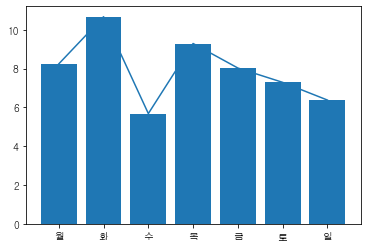

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/gulim.ttc').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)
plt.xticks(rotation=0)

In [15]:
# 시간대별 (10월, 월요일에 출발할 때 가장 좋은 시간대는?)
import MySQLdb
conn=MySQLdb.connect(host='localhost',port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('''select CRSDepTime, avg(arrdelay) arrdelay from ontime where month=10 and dayofweek=1
group by CRSDepTime order by avg(arrdelay) limit 5''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2202, Decimal('-28.0000'))
(2216, Decimal('-22.2500'))
(1807, Decimal('-20.0000'))
(2154, Decimal('-17.6667'))
(1948, Decimal('-16.0000'))
